Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

#🎓 Aula 10 - KNN
21 de outubro de 2021


---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---


## Introdução
Neste exercício, vamos apresentar o algoritmo K-nearest neighbors (KNN) e mostrar algumas maneiras práticas.

Para uma classificação binária simples (duas classes, A e B), dados os conjuntos de dados de treinamento e teste e um número inteiro positivo K. O KNN tenta encontrar K vizinhos no conjunto de treinamento que são mais próximos desse registro e conta quantos dessas K vizinhos no conjunto de treinamento pertencem à classe A, e quantos pertencem à classe B. 

O registro é então classificado como pertencente à classe majoritária (com base na contagem de ocorrências), ou seja, o registro é considerado da classe i se a maioria dos K-vizinhos mais próximos no conjunto de treinamento pertencem à classe i.

Como pode ser visto, não há parâmetros que precisem ser aprendidos durante o treinamento para determinar se uma nova observação pertence à classe A ou B. O único parâmetro usado em KNN é k, que é um valor predeterminado. O algoritmo simplesmente funciona observando as amostras de treinamento, calculando distâncias e encontrando os exemplos K no conjunto de treinamento que estão mais próximos da nova observação. Assim, KNN é um algoritmo de aprendizagem não supervisionado (precisa de rótulos de treinamento).

O diagrama a seguir ilustra a ideia principal de como o algoritmo de k-vizinhos mais próximos funciona. Como K varia de 3 a 6, a classe da nova observação (estrela vermelha) muda de B para A porque a maioria das ocorrências é alterada. Ou seja, para K = 3, temos duas observações da classe B e uma da classe A, enquanto para K = 6, temos duas observações da classe B, e quatro da classe A.

<img src="http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png" width=600, align = "center">

KNN depende de 1) a escolha da métrica (por exemplo, euclidiana no exemplo acima) e 2) a escolha de K. Não há escolhas universais e, dependendo dos dados, é necessário examinar várias opções para encontrar um escolha adequada.

*Ressalvas:*

* Ao usar KNN, devemos garantir que não haja variáveis categóricas (fatores) envolvidas nas features, simplesmente porque não se pode encontrar a distância delas. Por exemplo, quando uma variável categórica assume valores do conjunto (maçã, laranja, banana, uvas ...), não se pode fazer uso de funções de distância numéricas, a menos que haja uma maneira pré-determinada de avaliar essas distâncias de um ponto de vista qualitativo.

* Se o conjunto de treinamento for altamente dimensional, KNN sofrerá com a maldição da dimensionalidade. Portanto, poderíamos usar uma técnica de redução de dimensionalidade antes de usar KNN. Ainda estudaremos essas técnicas nesse curso.

* Padronize o treinamento definido antes de usar KNN. Precisamente, pode-se pré-processar os dados de forma que cada recurso de treinamento (coluna) tenha uma média zero e um desvio padrão um. 


### 1) Entendendo os dados

Os dados utilizados no laboratório de hoje podem ser obtidos em:
https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

Aqui temos a assinatura de energia das leituras de um radar (integralizadas em faixas fixas no espectro de frequências).

Os dados são obtidos em: https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

Sendo que esses dados não possuem um cabeçalho e a última coluna representa R (rocha) e M (mina). Pretende-se classificar uma rocha ou mina pela assinatura do radar.



In [191]:
# Coloque aqui as bibliotecas necessárias para esse código
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

In [192]:
# Carregue aqui o Dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

### 2) Faça um histograma para a linha 0 e para a linha 20, contemplando todas as colunas exceto a última do Dataframe.

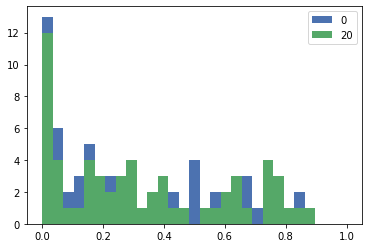

In [193]:
x = df.loc[0].drop(60)
y = df.loc[20].drop(60)

bins =np.linspace(0, 1, 30)

plt.hist(x, bins, label='0')
plt.hist(y, bins, label='20')
plt.legend(loc='upper right')
plt.show()

### 3) Quantos registros existem para minas (M) e quantos para rochas (R)?

In [194]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

### 4) Cheque se para todas as colunas existem dados faltantes.

In [195]:
qnts = df.isnull().sum() != 0
qnts.value_counts()

False    61
dtype: int64

5) Separe as features do target e normalize as features para média zero e desvio padrão um.

In [196]:
y = df[60]
X = df.drop(60,axis=1)
#features
#target

### 6) Separe os dados em 70% treinamento e 30% validação

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### 7) Qual a precisão do classificador KNN para K=5? 

In [198]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
KNN_True_False = KNN.predict(X_test) == y_test
acerto_e_erro = KNN_True_False.value_counts()
1-(acerto_e_erro[0] / (acerto_e_erro[0] + acerto_e_erro[1]))

# fiz a mão para maior entendimento do cálculo, porém o código está logo a baixo

#KNN_True_False
#acerto_e_erro

0.6825396825396826

In [199]:
KNN.score(X_test,y_test)

0.6825396825396826

### 8) Encontre qual o melhor valor de k através de testes. 

In [220]:
score = []
vizinho = []

for k in range(1,40):
  model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  score_1 = model.score(X_test,y_test)
  score.append(score_1)
  vizinho.append(k)


Text(0, 0.5, 'Score')

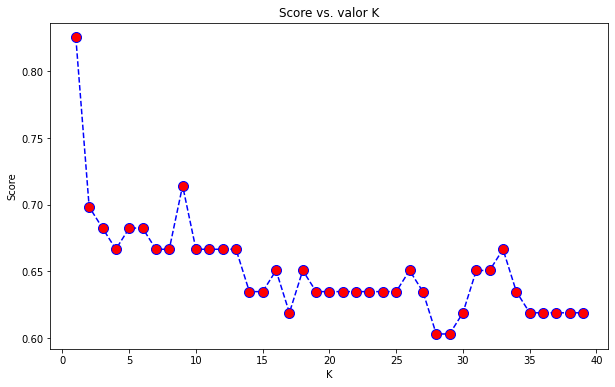

In [221]:
plt.figure(figsize=(10,6))
plt.plot(vizinho,score,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Score vs. valor K')
plt.xlabel('K')
plt.ylabel('Score')

## Pelo que podemos ver o melhor seria o 1, mas isso vária muito, se eu rodar  caderno de novo ele pode ser outro.